In [71]:
%matplotlib inline

import os
import imp
import sympy as sp
import numpy as np
import pandas as pd
from numpy import pi
from sympy.abc import x
from decimal import Decimal
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import stochastic_gradient_descent as sgd

report_dir = '../report'

In [82]:
imp.reload(sgd)

df = pd.read_csv("data.txt", delim_whitespace=True)
df['color'] = df.label.apply(lambda l: 'magenta' if l == 1 else 'cyan')
df['X'] = [np.array([1, x, y]) for (x, y) in zip(df.x, df.y)]

epsilons = [ 0.0025, 0.005, 0.00005]
print epsilons
model = {epsilon:{'theta':[], 'errors':[]} for epsilon in epsilons}
for i, epsilon in enumerate(epsilons):
    model[epsilon]['theta'], model[epsilon]['errors'] = sgd.fit(df.X.tolist(), df.label, alpha=0.05, 
                                                               epsilon=epsilon, max_iter=5000, h='logistic')

[0.0025, 0.005, 5e-05]


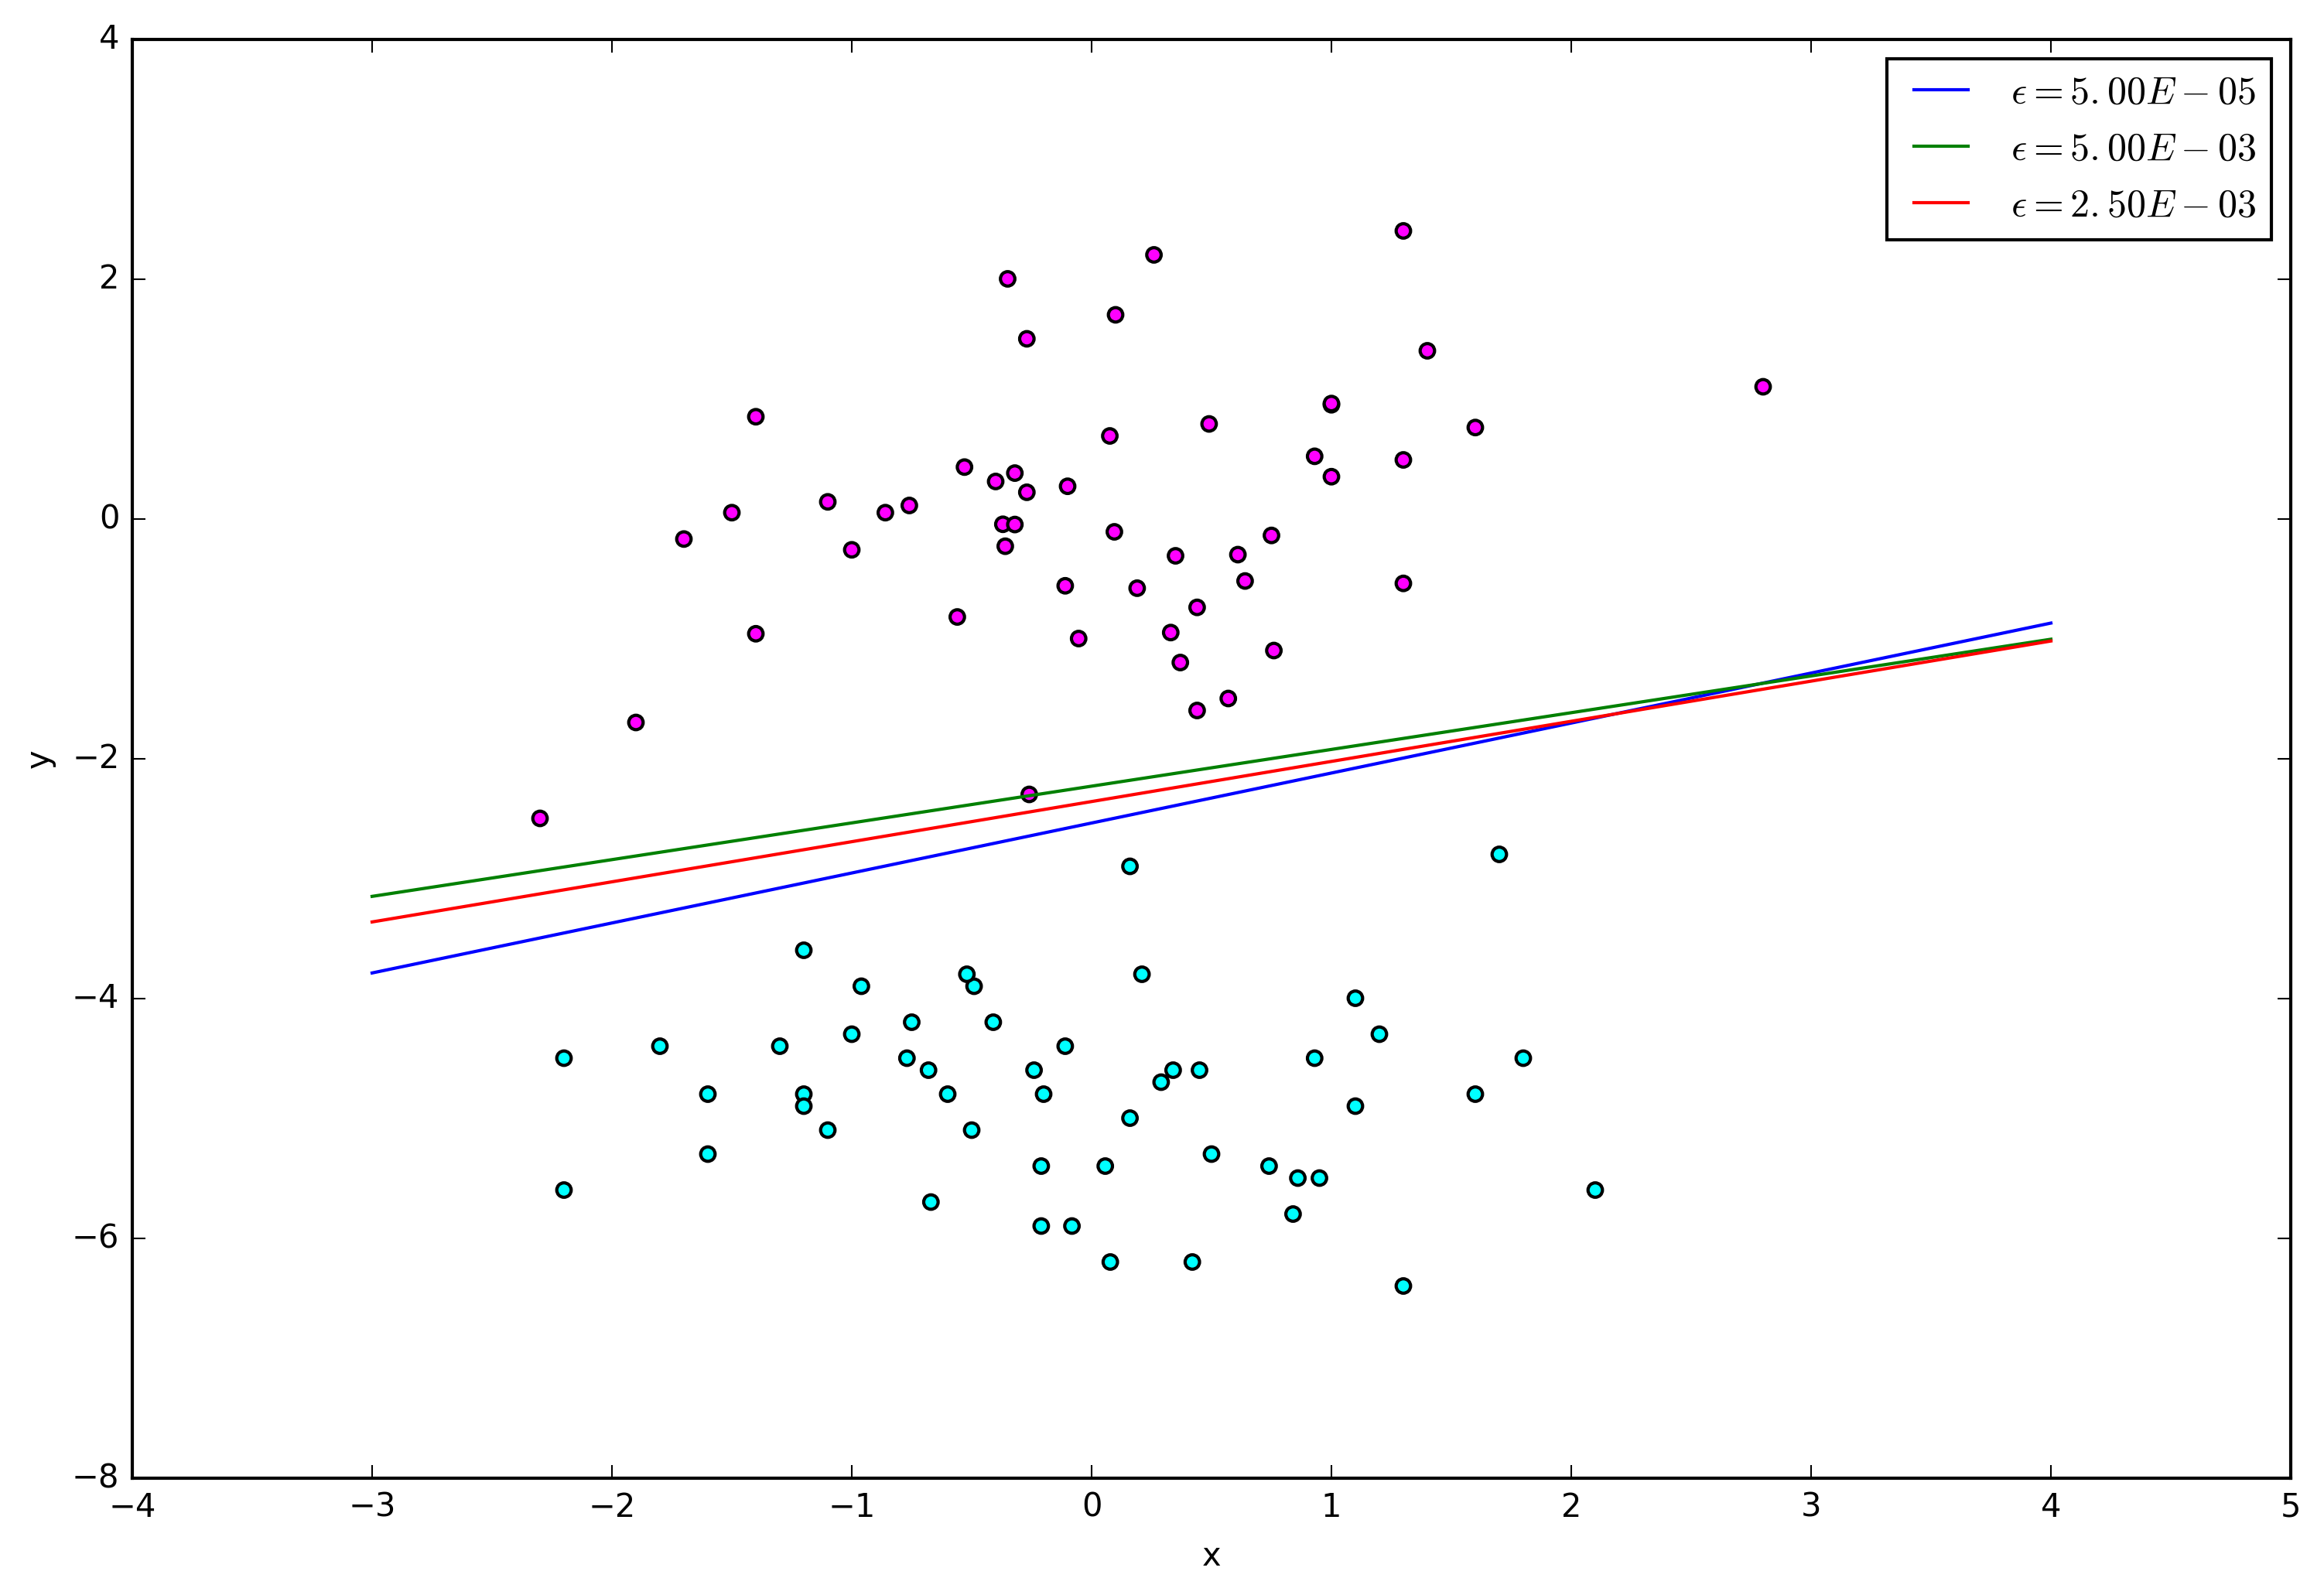

In [83]:
fig, ax = plt.subplots(num=None, figsize=(12, 8), dpi=300, facecolor='w', edgecolor='k')
ax.scatter(df.x, df.y, c=df.color, label = 'training')
fig_path = os.path.join(report_dir, 'fit.png')

for epsilon in model:
    theta = model[epsilon]['theta']
    f = lambda x: -1*(theta[0] + theta[1]*x)/theta[2]
    X = np.linspace(-3, 4, num=100) 
    ax.plot(X, map(f, X), label=r'$\epsilon = %.2E$' % Decimal(epsilon))
    t = [round(t, 4) for t in theta]

handles, labels = ax.get_legend_handles_labels()
i = labels.index('training')
del labels[i], handles[i]
ax.legend(handles, labels)     
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('')
plt.show()
fig.savefig(fig_path)